## Anomaly Detection SOM Experiment

Insert Code wherever represented with "#***************#"

In [1]:
!pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.3-py3-none-any.whl size=11706 sha256=9ceb1fbdefaa3821782b8772f0ba29410b15d7966b31d8f08e2fbdb66e4d7f23
  Stored in directory: /root/.cache/pip/wheels/96/98/a5/52dee3e8ed1dbfc4d77e4da41b6d89dd7ab9ead1b921e766f8
Successfully built minisom


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Minisom library and module is used for performing Self Organizing Maps
from minisom import MiniSom

In [5]:
# Loading Data
data = pd.read_csv('/content/Credit_Card_Applications.csv')

# X
data

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,15808223,1,31.57,10.500,2,14,4,6.500,1,0,0,0,2,0,1,1
686,15769980,1,20.67,0.415,2,8,4,0.125,0,0,0,0,2,0,45,0
687,15675450,0,18.83,9.540,2,6,4,0.085,1,0,0,0,2,100,1,1
688,15776494,0,27.42,14.500,2,14,8,3.085,1,1,1,0,2,120,12,1


In [6]:
# Shape of the data:
"""
    Write Code to display shape of data
"""
#********************#
data.shape

(690, 16)

In [7]:
# Info of the data:
"""
    Write Code to display information of data using inbuilt info function
"""
#********************#
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  690 non-null    int64  
 1   A1          690 non-null    int64  
 2   A2          690 non-null    float64
 3   A3          690 non-null    float64
 4   A4          690 non-null    int64  
 5   A5          690 non-null    int64  
 6   A6          690 non-null    int64  
 7   A7          690 non-null    float64
 8   A8          690 non-null    int64  
 9   A9          690 non-null    int64  
 10  A10         690 non-null    int64  
 11  A11         690 non-null    int64  
 12  A12         690 non-null    int64  
 13  A13         690 non-null    int64  
 14  A14         690 non-null    int64  
 15  Class       690 non-null    int64  
dtypes: float64(3), int64(13)
memory usage: 86.4 KB


In [8]:
# Defining X variables for the input of SOM
X = data.iloc[:, 1:14].values
y = data.iloc[:, -1].values

# X variables:
"""
    Convert X variable into a pandas DataFrame
"""
#********************#
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.0,22.08,11.460,2.0,4.0,4.0,1.585,0.0,0.0,0.0,1.0,2.0,100.0
1,0.0,22.67,7.000,2.0,8.0,4.0,0.165,0.0,0.0,0.0,0.0,2.0,160.0
2,0.0,29.58,1.750,1.0,4.0,4.0,1.250,0.0,0.0,0.0,1.0,2.0,280.0
3,0.0,21.67,11.500,1.0,5.0,3.0,0.000,1.0,1.0,11.0,1.0,2.0,0.0
4,1.0,20.17,8.170,2.0,6.0,4.0,1.960,1.0,1.0,14.0,0.0,2.0,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1.0,31.57,10.500,2.0,14.0,4.0,6.500,1.0,0.0,0.0,0.0,2.0,0.0
686,1.0,20.67,0.415,2.0,8.0,4.0,0.125,0.0,0.0,0.0,0.0,2.0,0.0
687,0.0,18.83,9.540,2.0,6.0,4.0,0.085,1.0,0.0,0.0,0.0,2.0,100.0
688,0.0,27.42,14.500,2.0,14.0,8.0,3.085,1.0,1.0,1.0,0.0,2.0,120.0


In [9]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range = (0, 1))
"""
    apply fit_transform using the created MinMaxScaler sc on variable X
"""
# Write Code
X = sc.fit_transform(X)
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.0,0.125263,0.409286,0.5,0.230769,0.375,0.055614,0.0,0.0,0.000000,1.0,0.5,0.05
1,0.0,0.134135,0.250000,0.5,0.538462,0.375,0.005789,0.0,0.0,0.000000,0.0,0.5,0.08
2,0.0,0.238045,0.062500,0.0,0.230769,0.375,0.043860,0.0,0.0,0.000000,1.0,0.5,0.14
3,0.0,0.119098,0.410714,0.0,0.307692,0.250,0.000000,1.0,1.0,0.164179,1.0,0.5,0.00
4,1.0,0.096541,0.291786,0.5,0.384615,0.375,0.068772,1.0,1.0,0.208955,0.0,0.5,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1.0,0.267970,0.375000,0.5,1.000000,0.375,0.228070,1.0,0.0,0.000000,0.0,0.5,0.00
686,1.0,0.104060,0.014821,0.5,0.538462,0.375,0.004386,0.0,0.0,0.000000,0.0,0.5,0.00
687,0.0,0.076391,0.340714,0.5,0.384615,0.375,0.002982,1.0,0.0,0.000000,0.0,0.5,0.05
688,0.0,0.205564,0.517857,0.5,1.000000,0.875,0.108246,1.0,1.0,0.014925,0.0,0.5,0.06


In [10]:
# Set the hyper parameters
som_grid_rows = 10
som_grid_columns = 10
iterations = 20000
sigma = 1
learning_rate = 0.5

# define SOM:
"""
    Create MiniSom Model using above hyperparemeters with
    x = som_grid_rows
    y = som_grid_columns
    sigma = sigma
    input_len = 13
    and learning_rate = learning_rate
"""
# Declare MiniSom Model
som = MiniSom(x = som_grid_rows, y = som_grid_columns, input_len=13, sigma=sigma, learning_rate=learning_rate)

In [11]:
# Initializing the weights
som.random_weights_init(X)

# Training
"""
    Train som model using train_random on varible X for above mentioned iterations
"""
#********************#
som.train_random(X, iterations)

# Returns the distance map from the weights:
som.distance_map()

array([[0.1950732 , 0.32921004, 0.25329873, 0.2789851 , 0.24467048,
        0.25045655, 0.29034931, 0.26613172, 0.30177337, 0.16725516],
       [0.35468486, 0.58866091, 0.63530275, 0.46169484, 0.61443245,
        0.55787901, 0.57204463, 0.60142555, 0.56850916, 0.33381473],
       [0.42366987, 0.62403634, 0.69259476, 0.68840873, 0.75096909,
        0.74083993, 0.64547972, 0.77759564, 0.66658682, 0.41356181],
       [0.45179239, 0.72314314, 0.63873978, 0.63139348, 0.59545889,
        0.59028903, 0.68772733, 0.70160646, 0.50518659, 0.30059489],
       [0.40552827, 0.72196955, 0.64384891, 0.70728276, 0.48925002,
        0.43356936, 0.56831213, 0.53305038, 0.42386958, 0.31750659],
       [0.38624343, 0.69143082, 0.74825031, 0.64111415, 1.        ,
        0.65830563, 0.47683476, 0.50124527, 0.58140285, 0.33902704],
       [0.40822389, 0.54952654, 0.57567876, 0.68698511, 0.70773758,
        0.58972207, 0.54854273, 0.55614643, 0.51616081, 0.39610681],
       [0.25611296, 0.50884039, 0.6418054

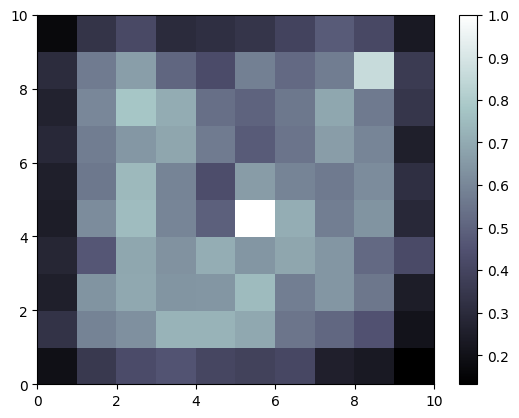

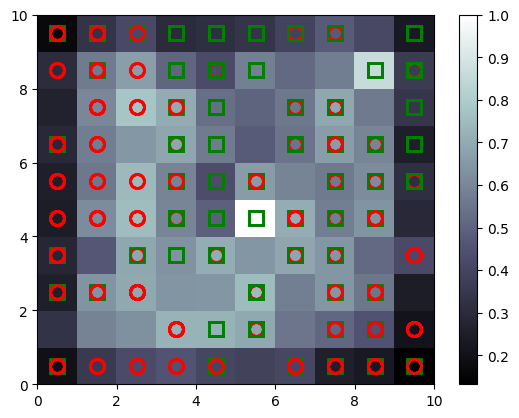

In [12]:
from pylab import plot, axis, show, pcolor, colorbar, bone

bone()
pcolor(som.distance_map().T)       # Distance map as background
colorbar()
show()
bone()
pcolor(som.distance_map().T)
colorbar() #gives legend

markers = ['o', 's']                 # if the observation is fraud then red circular color or else green square
colors = ['r', 'g']

for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)

show()

In [13]:
"""
    Write code to store som win_map into a variable names mappings
"""
#mappings = #********************#
mappings = som.win_map(X)
mappings
mappings.keys()
"""
    Write code to find the length of mapping.keys()
"""
#********************#
len(mappings.keys())


78

In [17]:
mappings[(9,8)]
frauds = np.concatenate((mappings[(0,9)], mappings[(9,8)]), axis = 0)
frauds

array([[0.        , 0.16165414, 0.0625    , 0.        , 0.53846154,
        0.375     , 0.00578947, 0.        , 0.        , 0.        ,
        0.        , 0.5       , 0.066     ],
       [0.        , 0.23684211, 0.07142857, 0.        , 0.69230769,
        0.875     , 0.07017544, 0.        , 0.        , 0.        ,
        0.        , 0.5       , 0.128     ],
       [0.        , 0.06646617, 0.35714286, 0.        , 0.76923077,
        0.875     , 0.00578947, 0.        , 0.        , 0.        ,
        0.        , 0.5       , 0.17      ],
       [0.        , 0.10646617, 0.01785714, 0.        , 0.69230769,
        0.125     , 0.03508772, 0.        , 0.        , 0.        ,
        0.        , 0.5       , 0.13      ],
       [0.        , 0.19172932, 0.09678571, 0.        , 0.53846154,
        0.375     , 0.00298246, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.04      ],
       [0.        , 0.13157895, 0.30214286, 0.        , 1.        ,
        0.375     , 0.08631

In [18]:
# the list of customers who are frauds:
"""
    Convert he fraud customers back into original values using Standard Scaler(sc) inverse_transform and store into a variable named frauds1
"""
#frauds1 = #********************#
frauds1=sc.inverse_transform(frauds)
pd.DataFrame(frauds1)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,24.50,1.750,1.0,8.0,4.0,0.165,0.0,0.0,0.0,0.0,2.0,132.0
1,0.0,29.50,2.000,1.0,10.0,8.0,2.000,0.0,0.0,0.0,0.0,2.0,256.0
2,0.0,18.17,10.000,1.0,11.0,8.0,0.165,0.0,0.0,0.0,0.0,2.0,340.0
3,0.0,20.83,0.500,1.0,10.0,2.0,1.000,0.0,0.0,0.0,0.0,2.0,260.0
4,0.0,26.50,2.710,1.0,8.0,4.0,0.085,0.0,0.0,0.0,0.0,1.0,80.0
5,0.0,22.50,8.460,1.0,14.0,4.0,2.460,0.0,0.0,0.0,0.0,2.0,164.0
6,0.0,29.50,1.085,1.0,14.0,4.0,1.000,0.0,0.0,0.0,0.0,2.0,280.0
7,0.0,33.25,3.000,1.0,6.0,4.0,2.000,0.0,0.0,0.0,0.0,2.0,180.0
8,0.0,24.50,2.415,1.0,8.0,4.0,0.000,0.0,0.0,0.0,0.0,2.0,120.0
9,1.0,33.50,1.750,2.0,14.0,8.0,4.500,1.0,1.0,4.0,1.0,2.0,253.0
